# Some Basic Statistics

Some basic functions for variance using numpy and scipy.

By the end of this file you should have seen simple examples of:
1. Mean, standard deviation and variance
2. Confidence intervals
3. One-way analysis of variance (ANOVA)
4. Student's T-test
5. F-test
6. Coefficient of determination
7. Pearson's correlation coefficient
8. Probability Distribution Functions (PDFs)

Further Reading:  
https://docs.scipy.org/doc/scipy/reference/stats.html  
https://github.com/scipy/scipy/blob/master/scipy/stats/stats.py  
http://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm   
http://www.physics.csbsju.edu/stats/t-test.html  
https://onlinecourses.science.psu.edu/stat501/node/255  
http://originlab.com/doc/Origin-Help/ANOVA-CRD  
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html  

In [5]:
import numpy as np
from numpy.random import normal, rand
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

### Mean, Standard Deviation and Variance

These all give an initial sense of the distribution of numbers - where they are centered (mean) and how spread out they are (standard deviation and variance). 

Keep in mind that the variance is the square of the standard deviation.

In [6]:
nums = normal(2,3,1000)

We can do these calculations manually:

In [7]:
mean = (1/len(nums))*np.sum(nums)
print('The mean is: %g' % mean)

stdev = np.sqrt(1/len(nums) * np.sum((nums - mean)**2))
print('The standard deviation (all samples, or the population) is: %g' % stdev)

stdev = np.sqrt(1/(len(nums)-1) * np.sum((nums - mean)**2))
print('The unbiased standard deviation (a group of samples, or a subset of the population) is: %g' % stdev)

var = (1/len(nums)) * np.sum((nums - mean)**2)
print('The variance is: %g' % var)

The mean is: 2.11196
The standard deviation (all samples, or the population) is: 3.04393
The unbiased standard deviation (a group of samples, or a subset of the population) is: 3.04546
The variance is: 9.26554


Or by using built-in functions:

In [8]:
mean = np.mean(nums)
print('The mean is: %g' % mean)

stdev = np.std(nums)
print('The standard deviation (all samples, or the population) is: %g' % stdev)

stdev = np.std(nums, ddof=1)
print('The standard deviation (a group of samples, or a subset of the population) is: %g' % stdev)

var = np.var(nums)
print('The variance is: %g' % var)

The mean is: 2.11196
The standard deviation (all samples, or the population) is: 3.04393
The standard deviation (a group of samples, or a subset of the population) is: 3.04546
The variance is: 9.26554


## Confidence Intervals

How sure are we that the measurements we've taken encompass the average value? Confidence intervals can be used to communicate this point.

Starting with a normally distributed set samples, we want to state with a known amount of confidence if the mean falls within the interval reported using that set of samples. 

We report:  
$\mu \pm \sigma_m T$  

where:  
$\mu$ is the mean value  
$T$ is the critical probability (more on this later)  
$\sigma_m = \frac{\sigma}{\sqrt{n}}$  is the standard error of the mean  
$\sigma$ is the standard deviation  
$n$ is the number of samples    

Note:
Because we're assuming that it's a subset of the population, we're concered with the a critical probaility determined with the t-distribution instead of the normal distribution. This is more accurate for lower sampling because it takes into account the degrees of freedom. Keep in mind the T- and the normal distributions converge for large sampling.

In [9]:
# Start with normally distributed group of samples
grp1 = normal(100,5,10000)

In [10]:
# Compute the standard error of the mean
grp1_avg = np.mean(grp1)
grp1_std = np.std(grp1, ddof=1)
standard_err = grp1_std/np.sqrt(np.size(grp1))

#Determine the critical probability that corresponds to 1/2 of the 95% confidence interval (see Distributions)
conf_int = 0.95
dof = len(grp1)-1 # We use the degrees of freedom of n-1 because it's a sample of the population
T_val = stats.t.ppf(1-(1-conf_int)/2, dof) 

# The average value, reported with 95% confidence is:
conf_int = T_val*standard_err
lower_int = grp1_avg - T_val*standard_err
upper_int = grp1_avg + T_val*standard_err

print("The value is %0.3g ± %0.3g (95%% confidence interval)" % ( grp1_avg, conf_int))
print("or a range of %0.6g to %0.6g" % ( lower_int,upper_int ))

The value is 100 ± 0.0982 (95% confidence interval)
or a range of 99.983 to 100.179


We can also use the built in function for determining the 95% confidence interval:

In [11]:
lower_int, upper_int = stats.t.interval(0.95, len(grp1)-1, loc=np.mean(grp1), scale=stats.sem(grp1))
print("A range of %0.6g to %0.6g" % (lower_int, upper_int))

A range of 99.983 to 100.179


## One-Way Analysis of Variance ANOVA 

Here, we're looking to determine multiple groups of samples are from the same population or from different populations, using a single factor (independent variable) that affects the mean value of the group.

Keep in mind that the samples should be continuous and independent.

### Two groups: Student's T Test

Let's say we want to see if the average value of the group of samples we measured was different from that of a different group.

Here, we can test if the mean of two small samples is different. In other words, we see if we can reject the null hypothesis (there is no difference between the two populations). We want to determine if any difference is due to sampling or experimental error, or if the means are different.

This is intended for normally distributed continuous distributions.

Fun fact: the 'student' is actually William S. Gossett, a brewmaster who worked at the Guinness brewery. 

In [12]:
from scipy.stats import ttest_ind, ttest_rel

In [13]:
# Three similar groups of data
grp1 = normal(45,23,5)
grp2 = normal(45,23,5)
grp3 = normal(10,12,5)

We can do this by hand, integrating the student t-distribution cumulative density fuction directly. Z-tables, which are precalculated cumulate density function values may also be used, but aren't discussed here - we just use the built in function to determine exactly. 

The following relations use:

$n$ is the number of samples  
$\bar{X}$ is the expectation value  
$s_1^2 = \frac{1}{n-1} \sum^{n}_{1} (x_i-\bar{X})^2$ 


#### Equal sample sizes, equal variances
$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p\sqrt{2/n}}$  
where:  
$s_{pool} = \sqrt{\frac{s_1^2 + s_2^2}{2}}$


#### Equal or unequal sample sizes, equal variances  
$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$  
where:  
$s_{pool} = \sqrt{\frac{(n_1 -1) s_1^2 + (n_2 -1) s_2^2}{n_1 + n_2 -1}}$

#### Equal or unequal sample sizes, unequal variances
$t = \frac{\bar{X}_1 - \bar{X}_2}{s_\delta}$  
where:  
$s_\delta = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$  
 

In [14]:
grp1_siz = grp1.size
grp1_dof = grp1_siz - 1
grp1_avg = np.sum(grp1)/grp1_siz
grp1_var = 1/(grp1_dof)* np.sum((grp1 - grp1_avg)**2)

grp2_siz = grp2.size
grp2_dof = grp2_siz - 1
grp2_avg = np.sum(grp2)/grp2_siz
grp2_var = 1/(grp2_dof)* np.sum((grp2 - grp2_avg)**2)

grp3_siz = np.size(grp3)
grp3_avg = np.sum(grp3)/grp3_siz
grp3_dof = grp3_siz - 1
grp3_var = 1/(grp3_dof)* np.sum((grp3 - grp3_avg)**2)

# Calculate the student's T and P values: 

# Equal sample size, assumed equal variance:
pooled_var = np.sqrt( (grp1_var + grp2_var)/2)
t = (grp1_avg - grp2_avg)/(pooled_var*np.sqrt(2/grp1.size))
# Calculate P value:
degFreedom = (grp1_var/grp1_siz + grp2_var/grp2_siz)**2/((grp1_var/grp1_siz)**2/grp1_dof + (grp2_var/grp2_siz)**2/grp2_dof)
p = 2*stats.t(degFreedom).sf(np.abs(t)) #we want 2x the area under the curve from neg infinity to the neg t value
print(" t = %g p = %g" % (t, p) )

# Equal or unequal sample size, assumed equal variance:
pooled_var = np.sqrt( (grp1_dof*grp1_var+grp2_dof*grp2_var)/(grp1_siz+grp2_siz-2) )
t = (grp1_avg - grp2_avg)/(pooled_var*np.sqrt(1/grp1_siz + 1/grp2_siz))
# Calculate P value:
degFreedom = (grp1_var/grp1_siz + grp2_var/grp2_siz)**2/((grp1_var/grp1_siz)**2/grp1_dof + (grp2_var/grp2_siz)**2/grp2_dof)
p = 2*stats.t(degFreedom).sf(np.abs(t))
print(" t = %g p = %g" % (t, p))

# Equal or unequal sample size, assumed unequal variance:
var = np.sqrt( grp1_var/grp1_siz + grp3_var/grp3_siz )
t = (grp1_avg - grp3_avg)/var
# Calculate P value:
degFreedom = (grp1_var/grp1_siz + grp3_var/grp3_siz)**2/((grp1_var/grp1_siz)**2/grp1_dof + (grp3_var/grp3_siz)**2/grp3_dof)
p = 2*stats.t(degFreedom).sf(np.abs(t))
print(" t = %g p = %g" % (t, p))

 t = 0.188783 p = 0.855038
 t = 0.188783 p = 0.855038
 t = 3.61085 p = 0.0102224


Or use built-in functions:

In [15]:
# Equal sample size, assumed equal variance:
t, p = ttest_rel(grp1, grp2)
print("ttest_rel   eq_var: t = %g  p = %g" % (t, p))

# Equal or unequal sample size, assumed equal variance:
t, p = ttest_ind(grp1, grp2, equal_var=True)
print("ttest_ind   eq_var: t = %g  p = %g" % (t, p))

#Note that the first and second t-tests converge as sampling approaches infinity.

# Equal or unequal sample size, assumed unequal variance:
t, p = ttest_ind(grp1, grp3, equal_var=False)
print("ttest_ind uneq_var: t = %g  p = %g" % (t, p))

ttest_rel   eq_var: t = 0.450095  p = 0.675957
ttest_ind   eq_var: t = 0.188783  p = 0.854964
ttest_ind uneq_var: t = 3.61085  p = 0.0102224


If the p-value is smaller than the threshold (i.e. 1% or 5%, etc.) then we reject the null hypothesis. Note that the first and second tests converge as sampling approaches infinity.

### When There are ($\geq$2) Groups: One-way ANOVA F-test statistic

Lets say we want to test if the average value for multiple groups of samples are different from each other. 

Here, we determine the ratio of the variation between sample means to the variation within the samples. In other words, we see if we can reject the null hypothesis (all are the same). We want to know if the difference is due to sampling or experimental error, or one of them is different.

While there are several different F-tests, we'll focus on a test to determine if the means of a given set of normally distributed values are equal. 

Here, the test is checking if the variance between the groups is greater than the variance within the groups, along with the probability of observing this purely by chance using the F-distribution.

In [16]:
grp1 = normal(45,23,500)
grp2 = normal(45,23,500)
grp3 = normal(10,12,500)

Here, we use:

$F_{stat} = \frac{\text{between set variability}}{\text{within set variability}}$  

where:  
between set variability = $\sum^{K}_{i=1} \frac{n_i(\bar{X_i} -\bar{X})^2}{K - 1}$  
within set variability = $\sum^{K}_{i=1} \sum^{n_i}_{j=1} \frac{(X_{ij} -\bar{X_i})^2}{N - K}$  

and:  
$\bar{X}$ is the mean of all data  
$\bar{X_i}$ is the mean of set $i$  
K is the number of sets  
N is the overall sample size  

In [17]:
#import scipy.special as special
all_grps = [grp1, grp2, grp3]

num_grps = float(len(all_grps))
alldata = np.concatenate(all_grps)
alldata_avg = np.mean(alldata)
alldata_siz = np.size(alldata)

bsv = 0
for a in all_grps:
    bsv += (np.size(a)* (np.mean(a)-alldata_avg)**2)/(num_grps-1)

wsv = 0
for a in all_grps:
    for i in a:
        wsv += (i - np.mean(a))**2/(alldata_siz - num_grps)

f_stat = bsv/wsv

prob = stats.f(num_grps-1, alldata_siz-num_grps).sf(np.abs(f_stat))

print('F-statistic is %g p is %g' % (f_stat, prob))

F-statistic is 515.52 p is 4.6745e-171


In [18]:
f, p = stats.f_oneway(grp1,grp2,grp3)

print('F-statistic is %g p is %g' % (f, p))

F-statistic is 515.52 p is 4.6745e-171


### Coefficient of Determination ($R^2$)

Here we calculate a measure of how well the observed outcomes are replicated by the model, as the propotion of total variation of outcomes explained by the model.

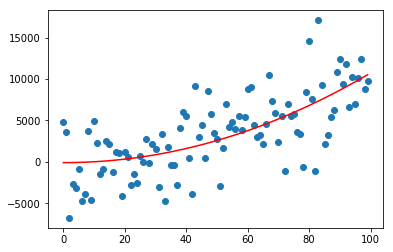

In [19]:
from scipy.optimize import curve_fit

# Create Arbitrary Function 
x_vals = np.arange(0,100)
y_vals = x_vals**2 + normal(0,3000,np.size(x_vals))

# Fit and create fit line
def func(x_vals, B, C):
    return x_vals**B + C
opt, cov = curve_fit(func, x_vals, y_vals)
x_fitted = np.linspace(0, max(x_vals), 100)
y_fitted = func(x_fitted, *opt)

# Show fit
plt.scatter(x_vals, y_vals)
plt.plot(x_fitted, y_fitted, color='red')
plt.show()

Compute by hand:


$R^2 = \frac{SS_{regr}}{SS_{total}}$  

where:  
$SS_{regr} = \sum^{n}_{1} (\hat{x_i}-\bar{X})^2$  
$SS_{total} = \sum^{n}_{1} (x_i-\bar{X})^2$  

and:  
$\hat{x_i}$ is the fitted value  
$\bar{X}$ is the average value of X  
$x_i$ is the measured value of x  

In [20]:
y_avg = np.mean(y_vals)
y_fit = func(x_vals, *opt)

SSregr  = np.sum( (y_fit  - y_avg )**2 )
SSerror = np.sum( (y_vals - y_fit )**2 )
SStotal = np.sum( (y_vals - y_avg )**2 )

Rsq = SSregr/SStotal
print('R squared is: %g' % Rsq)

R squared is: 0.465227


### Pearson's correlation coefficient

For two sets of data, how correlated are the two, on a scale of -1 to 1? 
Here, we do a simple calculation to check if the two sets of data are correlated. 

We can also calculate a p-value for the Pearson's correlation coefficient, indicating the propability of an uncorrelated system producing data that has the Pearson correlation at least as extreme (not reliable for small datasets).

Keep in mind that the correlation coefficient is defined for sets of the same size.

In [21]:
from scipy.stats import pearsonr

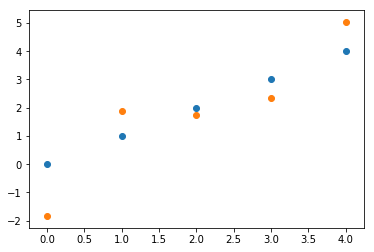

In [22]:
grp1 = list(range(0,5))
grp2 = grp1+normal(0,1,np.size(grp1))

plt.scatter(grp1, grp1)
plt.scatter(grp1, grp2)
plt.show()

Again we can do this by hand:

$\rho = \frac{ \sum^{n}_{1} (1/n) (X_1 - \bar{X}_1) (X_2 - \bar{X}_2)}{s_1^2 s_2^2}$  

The p value can be determined by converting $\rho$ to a student's t and then determining the area under the distribution function:

$t_{conv} = \frac{\rho}{\sqrt{( 1-\rho^2) / (n-2)}} $


In [23]:
grp1_siz = np.size(grp1)
grp1_avg = np.sum(grp1)/grp1_siz
grp1_std = np.sqrt((1/grp1_siz) * np.sum((grp1 - grp1_avg)**2)) 

grp2_siz = np.size(grp2)
grp2_avg = np.sum(grp2)/grp2_siz
grp2_std = np.sqrt((1/grp2_siz) * np.sum((grp2 - grp2_avg)**2)) 

dof = grp1_siz - 2


# Note that the size of the two samples must be the same
pearson_r = np.sum( 1/grp1_siz*(grp1 - grp1_avg)*(grp2 - grp2_avg) ) / (grp1_std * grp2_std)

t_conv = pearson_r/np.sqrt( (1 - pearson_r**2)/(grp1_siz - 2) ) # convert to student's t value
p = 2*stats.t(dof).sf(np.abs(t_conv))

print("pearson_r = %g  p = %g" % (pearson_r, p))

pearson_r = 0.916238  p = 0.0287322


Or use built in functions:

In [24]:
r,p = pearsonr(grp1,grp2)

print("pearson_r = %g  p = %g" % (r, p))

pearson_r = 0.916238  p = 0.0287322


### Distributions

To get a better picture of how frequently a type of randomly distributed variable is measured in theory, we can use a mathematical function. This function is thought of as the probability of measuring the variable at that value.

Further reading:
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html

For example, perhaps the most well known distribution is the Gaussian, Normal, or Bell-Curve Distribution. This is from a set of gaussian distributed random numbers. We can generate a lot of these numbers and plot the frequency of each number within a set of 'bins':

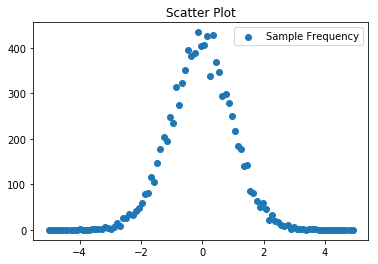

In [25]:
num_samples = 10000
span = 10
rand_gen = normal(0,1,num_samples)        # Generate numbers
bins = np.linspace(-span/2,span/2,num=100)
histogram = np.histogram(rand_gen,bins);  # Use histogram to get distribution

X = histogram[1][:-1]
Y = histogram[0]
plt.scatter(X,Y, label="Sample Frequency")
plt.legend(loc='best')
plt.title('Scatter Plot')
plt.show()

The probability distribution function (PDF), is a function that represents the probability of obtaining a particular value for a population that follows that particular distribution.  

Using a conversion factor, it's clear that the two overlap:

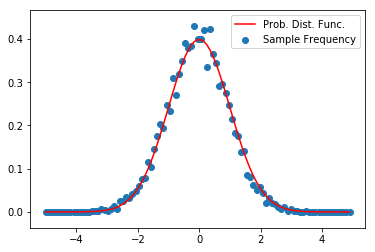

In [26]:
Y_pdf = stats.norm.pdf(X)                 # PDF function applied to the X values
conv_factor = len(X)/(span * num_samples) # Use a normalization factor to demonstrate the two are overlapped
plt.scatter(X,Y*conv_factor, label="Sample Frequency")
plt.plot(X,Y_pdf, color='red', label="Prob. Dist. Func.")
plt.legend(loc='best')
plt.show()

A common use of distributions is to determine the chance of measuring a value of at least some amount. Instead of looking at the probability of obtaining exactly a value, we can ask: what is the probability of obtaining somthing at least as large?

All we need is the integration of the PDF, known as the cumulative distribution function (CDF), as we're really looking for the area under the PDF up to a certain point.

Continuing our example:

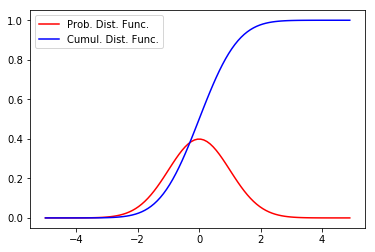

In [27]:
X_dof = np.size(X) - 1
Y_pdf = stats.norm.pdf(X) 
Y_cdf = stats.norm.cdf(X) 

plt.plot(X,Y_pdf, color='red', label="Prob. Dist. Func.")
plt.plot(X,Y_cdf, color='blue', label="Cumul. Dist. Func.")
plt.legend(loc='best')
plt.show()

For those that are wondering, the CDF is actually less than the PDF at a certain point because it's scaled such that the maximum value is one. Keep in mind the PDF is scaled such that the area beneath it is one. For more information, look into the integral of the PDF.

We use the CDF to determine the percent chance of obtaining something at least as large. I.e. what is the percent chance of getting at least 2?

In [28]:
stats.norm.cdf(2)

0.97724986805182079

### PDF of Students T Distribution

This doesn't seem that interesting until we consider the distributions used in the ANOVA analysis. Here we use the student t-distribution, which is extremely similar to the normal distribution except that it incorporates the fact that we often use a subset of the population (and thus degrees of freedom = n-1) :

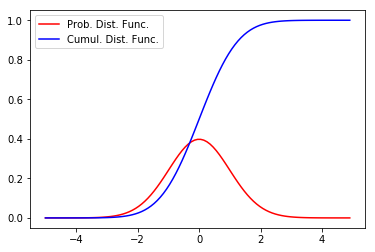

In [29]:
dof = np.size(X) - 1
Y_t_pdf = stats.t(dof).pdf(X)
Y_t_cdf = stats.t(dof).cdf(X) 

plt.plot(X, Y_t_pdf, color='red', label="Prob. Dist. Func.")
plt.plot(X, Y_t_cdf, color='blue', label="Cumul. Dist. Func.")
plt.legend(loc='best')
plt.show()

Let's say our t value is: -1.47254. For the p value of the t-test (two-tailed), we're concerned with getting the the value under the two sides of the distribution. Here we're ignoring the sign of the t value and treating it as a negative value for a zero-mean t-distribution probability distribution function.

For the two-tailed p value on a t-test:

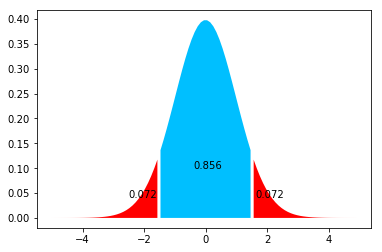

In [30]:
t = -1.47254

# Use CDF to determine probabilities
left_prob    = stats.t(dof).cdf(-np.abs(t))     
right_prob   = stats.t(dof).sf(np.abs(t)) # The survival function is 1-CDF
between_prob = 1-(left_prob+right_prob)

# Plot t-distribution, highlighting the different plot areas
left_ind    = X <= -np.abs(t)
right_ind   = X >= np.abs(t)
between_ind = (X > -np.abs(t)) & ( X < np.abs(t))

plt.fill_between(X[left_ind],stats.t(dof).pdf(X[left_ind]), facecolor='red')
plt.fill_between(X[right_ind],stats.t(dof).pdf(X[right_ind]), facecolor='red')
plt.fill_between(X[between_ind],stats.t(dof).pdf(X[between_ind]),facecolor='deepskyblue')

# Label the plot areas
plt.text(x=1.7*t,y=0.04, s='%0.3g' % left_prob)
plt.text(x=-0.4,y=0.1,s='%0.3g' % between_prob)
plt.text(x=1.1*-t,y=0.04, s='%0.3g' % right_prob)
plt.show()

The two-tailed test (i.e. including both sides) is simply 2x the value of the area of one of the sides:

In [31]:
p = 2*stats.t(dof).sf(np.abs(t))
print("%g" % p)

0.14408


## Confidence Intervals from a Distribution Perspective

Working backwards, we're interested an interval of the probability distribution function that encompasses 95% of the area. To do so, we remove 1/2 of the confidence interval on each side of the distribution, and determine what that value should be.

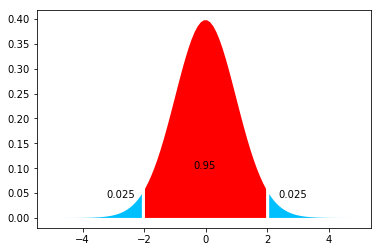

The T_val, when used as a ± that represents the 95 percent confidence interval is: 1.98447


In [32]:
conf_int = 0.95  

# We use the t-distribution in lieu of the normal distribution because the samples are a subset of the population 
# the inverse of the CDF for the normal distribution is known as the percent point function
T_val = stats.t.ppf(1-(1-conf_int)/2,dof)

# Use CDF to check that probabilities are correct
left_prob    = stats.t.cdf(-T_val, dof)     
right_prob   = stats.t.sf(T_val, dof) # The survival function is 1-CDF
between_prob = 1-(left_prob+right_prob)


# Plot T distribution, highlighting the different plot areas
left_ind    = X <= -T_val
right_ind   = X >= T_val
between_ind = (X > -T_val) & ( X < T_val)

plt.fill_between(X[left_ind],stats.t.pdf(X[left_ind],dof), facecolor='deepskyblue')
plt.fill_between(X[right_ind],stats.t.pdf(X[right_ind],dof), facecolor='deepskyblue')
plt.fill_between(X[between_ind],stats.t.pdf(X[between_ind],dof),facecolor='red')

# Label the plot areas
plt.text(x=2.2*t,y=0.04, s='%0.3g' % left_prob)
plt.text(x=-0.4,y=0.1,s='%0.3g' % between_prob)
plt.text(x=1.6*-t,y=0.04, s='%0.3g' % right_prob)
plt.show()

print("The T_val, when used as a ± that represents the 95 percent confidence interval is: %0.6g" % T_val)